In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load data

In [2]:
ny_crime = pd.read_excel('crime_in_ny_state.xls', header=4, nrows=348)

In [3]:
ny_crime.tail()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
343,Woodbury Town,10685,3,0,NaN,0,2,1,541,9,529,3,NaN
344,Woodridge Village,829,7,0,NaN,0,0,7,17,8,9,0,0.0
345,Woodstock Town,5931,2,0,NaN,0,0,2,58,13,45,0,NaN
346,Yonkers,199134,1036,6,NaN,25,390,615,2368,470,1662,236,10.0
347,Yorktown Town,36643,15,0,NaN,0,2,13,334,45,287,2,NaN


### Clean data

In [4]:
ny_crime.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [5]:
ny_crime = ny_crime.rename(columns= {'City':'city', 'Population':'pop', 
                          'Violent\ncrime':'violent_crime', 
                          'Murder and\nnonnegligent\nmanslaughter': 'murder',
                          'Rape\n(revised\ndefinition)1': 'rape_new',
                          'Rape\n(legacy\ndefinition)2': 'rape_old', 
                          'Robbery': 'robbery', 
                          'Aggravated\nassault': 'assault', 
                          'Property\ncrime': 'property_crime', 
                          'Burglary': 'burglary', 
                          'Larceny-\ntheft': 'larceny', 
                          'Motor\nvehicle\ntheft':'vehicle_theft', 
                          'Arson3':'arson'})

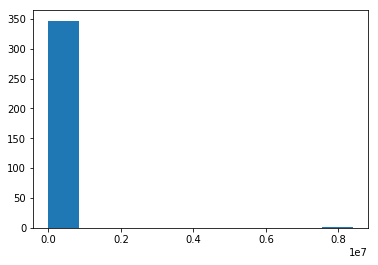

In [6]:
plt.hist(ny_crime['pop'])
plt.show()

In [7]:
ny_crime['murder'].unique()

array([  0,   8,   1,   3,  47,  10,   2,   5, 335,   7,  42,   4,  21,
         6])

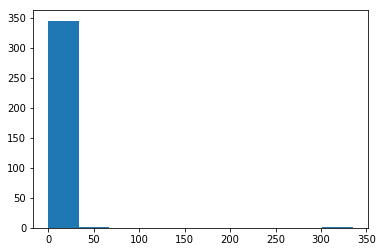

In [8]:
plt.hist(ny_crime.murder)
plt.show()

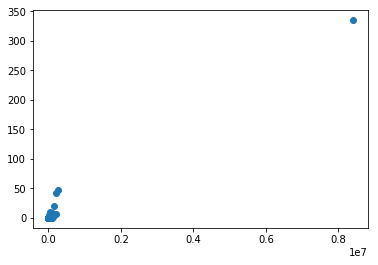

In [9]:
plt.scatter(x = ny_crime['pop'], y = ny_crime['murder'])
plt.show()

In [10]:
ny_crime.loc[ny_crime.murder > 300, ]

,city,pop,violent_crime,murder,rape_new,rape_old,robbery,assault,property_crime,burglary,larceny,vehicle_theft,arson
216,New York,8396126,52384,335,NaN,1112,19170,31767,141971,16606,117931,7434,NaN


The New York City point is such an outlier it will swamp the data.

In [11]:
ny_crime_no_ny = ny_crime.loc[ny_crime.murder < 300, ]

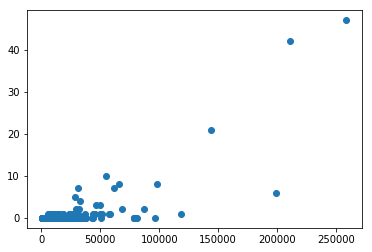

In [12]:
plt.scatter(ny_crime_no_ny['pop'], ny_crime_no_ny['murder'])
plt.show()

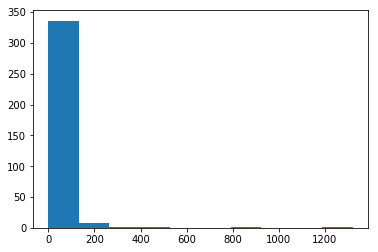

In [13]:
plt.hist(ny_crime_no_ny.robbery)
plt.show()

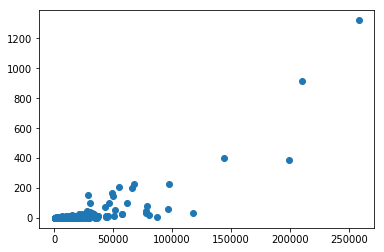

In [14]:
plt.scatter('pop', 'robbery', data=ny_crime_no_ny)

The NY City point is a massive outlier compared to the rest of the data. This does not matter so much for categorical variables but for the population variable it will have a huge influence on the regression due to its size. I will remove it from the data.

### Features

In [18]:
features = pd.DataFrame()

In [19]:
features['pop'] = ny_crime_no_ny['pop']
features['pop_sq'] = ny_crime_no_ny['pop']**2

In [20]:
features.head()

,pop,pop_sq
0,1861,3463321
1,2577,6640929
2,2846,8099716
3,97956,9595377936
4,6388,40806544


In [21]:
features['murder'] = np.where(ny_crime_no_ny.murder >0, 1, 0)

In [22]:
features['robbery'] = np.where(ny_crime_no_ny.robbery > 0, 1, 0)

In [23]:
features.head()

,pop,pop_sq,murder,robbery
0,1861,3463321,0,0
1,2577,6640929,0,0
2,2846,8099716,0,0
3,97956,9595377936,1,1
4,6388,40806544,0,1
